# Statistical Analysis for "VR as a Catalyst for the Energy Transition"

In [1]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, shapiro, mannwhitneyu, wilcoxon, chisquare
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter


In [2]:
data_pre = pd.read_csv('C:/Users/Nelathan/Downloads/Preliminary questionaire results - Formularantworten 1.csv')
data_final = pd.read_csv("C:/Users/Nelathan/Downloads/Befragung zur VR-PV-Simulation (Antworten) - Formularantworten 1.csv")
alpha = 0.05


In [3]:
def plot_histogram(data, title=""):
    plt.figure(figsize=(5, 2))
    plt.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='white')
    if title:
        plt.xlabel(title)
    plt.show()


In [4]:
def plot_stacked_bar(data, title=''):
    score_counts = Counter(data)
    scores = [score_counts[i] for i in range(1, 6)]
    colors = ['red', 'coral', 'gold', 'yellowgreen', 'limegreen']
    plt.figure(figsize=(5, 1))
    left = 0
    for i in range(len(scores)):
        plt.barh(0, scores[i], left=left, color=colors[i])
        left += scores[i]

    plt.xlabel('Number of Ratings')
    if title:
        plt.title(title)
    plt.yticks([])
    plt.show()


In [5]:
colors = ['red', 'coral', 'gold', 'yellowgreen', 'limegreen']
alpha = 0.05

def add_histogram(data, ax):
    ax.hist(data, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='white')
    ax.set_title("Histogram")

def add_bar_chart(data, ax):
    counts = Counter(data)
    categories = range(1, 6)
    counts_in_order = [counts[i] for i in categories]
    ax.bar(categories, counts_in_order, color=colors, edgecolor='white')
    ax.set_title("Histogram")

def add_stacked_bar(data, ax):
    score_counts = Counter(data)
    scores = [score_counts[i] for i in range(1, 6)]
    left = 0
    for i in range(len(scores)):
        ax.barh(0, scores[i], left=left, color=colors[i], height=0.5)
        left += scores[i]
    ax.set_title("Stacked bars")
    ax.set_ylim(-1, 1)
    ax.set_yticks([])

def add_boxplot(data, ax):
    ax.boxplot(data, vert=False)
    ax.set_xlim(0.5, 5.5)
    ax.set_title('Boxplot')
    ax.set_yticks([])

def plot(data, title=""):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3))
    add_bar_chart(data, axs[0])
    add_stacked_bar(data, axs[1])
    add_boxplot(data, axs[2])
    plt.tight_layout()
    if title:
        plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

def plot_quiz(data, correct_answer, title=""):

  results = Counter(data)

  sorted_results = {correct_answer: results[correct_answer]}
  for answer, count in results.items():
      if answer != correct_answer:
          sorted_results[answer] = count
  colors = [ 'limegreen' if answer == correct_answer else 'red' for answer in sorted_results ]

  fig, axs = plt.subplots(1, 2, figsize=(12, 3))

  sorted_answers = sorted(results.keys(), key=lambda x: (x != correct_answer, x))
  sorted_counts = [results[answer] for answer in sorted_answers]
  axs[0].bar(sorted_answers, sorted_counts, color=colors, edgecolor='white', align='center')
  axs[0].title.set_text("Histogram")

  left = 0
  for i, (answer, count) in enumerate(sorted_results.items()):
      axs[1].barh(0, count, left=left, color=colors[i], edgecolor='white')
      left += count

  axs[1].set_yticks([])
  axs[1].set_title("Stacked bars")
  axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.tight_layout()
  if title:
      plt.suptitle(title, fontsize=16, y=1.05)

  plt.show()

def use_shapiro(data):
  """
  Perform Shapiro-Wilk test to check if the data is normally distributed.

  Parameters:
  data (array-like): The data to be tested.

  Returns:
  bool: True if the data looks normally distributed, False otherwise.
  """
  stat, p = shapiro(data)
  print('Shapiro-Wilk Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print('✅ Data looks normally distributed.')
    return True
  else:
    print('❌ Data does not look normally distributed.')
    return False

def wilcoxon_test(data, null_hypothesis, testCount=1):
  """
  Perform a Wilcoxon test to compare the data against a null hypothesis.

  Parameters:
  - data: A numpy array or list containing the data to be tested.
  - null_hypothesis: A string representing the null hypothesis being tested.
  - testCount: An integer representing the number of tests being performed (default is 1).

  Returns:
  None

  Prints the following information:
  - Null Hypothesis: The provided null hypothesis.
  - Test Method: Wilcoxon test is used because the data is not normally distributed and the sample size is small.
  - Mean: The mean of the data.
  - Wilcoxon Test statistic: The test statistic value.
  - P-value: The p-value of the test.
  - Result: Whether to reject or support the null hypothesis based on the p-value and Bonferroni correction.

  """
  print("Null Hypothesis:", null_hypothesis)
  stat, p = wilcoxon(data - 3.000, alternative='greater')
  print("Mean:", np.mean(data))
  print('Wilcoxon Test statistic:', stat)
  print('P-value:', "{:.5f}".format(p))
  if p < alpha:
    if p < alpha/testCount:
      print("💡Reject H0: The effect is significant.")
    else:
      print("✋Support H0: The effect is insignificant, when Bonferroni corrected.")
  else:
    print("✋Support H0: The effect is insignificant.")

def t_test(data, null_hypothesis, testCount=1):
  """
  Perform a t-test to compare the data against a null hypothesis.

  Parameters:
  - data: A numpy array or list containing the data to be tested.
  - null_hypothesis: A string representing the null hypothesis being tested.
  - testCount: An integer representing the number of tests being performed (default is 1).

  Returns:
  None

  Prints the following information:
  - Null Hypothesis: The provided null hypothesis.
  - Test Method: t-test is used because the data is normally distributed.
  - Mean: The mean of the data.
  - t-statistic: The t-statistic value.
  - p-value: The p-value of the test.
  - Result: Whether to reject or support the null hypothesis based on the p-value and Bonferroni correction.

  """
  print("Null Hypothesis:", null_hypothesis)
  t_stat, p_value = ttest_1samp(data, popmean = 3, alternative = "greater")
  print("Mean:", np.mean(data))
  print("T-statistic:", t_stat)
  print("P-value:", "{:.6f}".format(p_value))
  if p_value < alpha:
    if p_value < alpha/testCount:
      print("💡Reject H0: The effect is significant.")
    else:
      print("✋Support H0: The effect is insignificant, when Bonferroni corrected.")
  else:
    print("✋Support H0: The effect is insignificant.")

def mann_whitney_u_test(data1, data2, null_hypothesis, testCount=1):
  """
  Perform the Mann-Whitney U test to compare two independent samples.

  Parameters:
  data1 (array-like): The first set of data.
  data2 (array-like): The second set of data.
  null_hypothesis (str): The null hypothesis being tested.
  testCount (int, optional): The number of tests being performed. Default is 1.

  Returns:
  None

  Prints the null hypothesis, Mann-Whitney U statistics, and the result of the test.

  """
  print("Null Hypothesis:", null_hypothesis)
  stat, p = mannwhitneyu(data1, data2, alternative='greater')
  print('Mann-Whitney U Statistics=%.0f, p=%.6f' % (stat, p))
  if p < alpha:
    if p < alpha/testCount:
      print("💡Reject H0: The effect is significant.")
    else:
      print("✋Support H0: The effect is insignificant, when Bonferroni corrected.")
  else:
    print("✋Support H0: The effect is insignificant.")

def perform_z_test(data, correct_answer, null_hypothesis, testCount=1):
  """
  Perform a z-test to compare the proportion of correct answers to a specified value.

  Args:
    data (list): A list of participant responses.
    correct_answer (any): The correct answer.
    null_hypothesis (str): The null hypothesis being tested.
    testCount (int, optional): The number of tests being performed. Defaults to 1.

  Returns:
    None

  Prints:
    - Null Hypothesis
    - Number of correct answers
    - Total number of participants
    - Mean correct answers as a percentage
    - Z-statistic
    - P-value
    - Result of the hypothesis test

  """
  results = Counter(data)
  n_correct = results[correct_answer]  # Number of correct answers
  n_total = len(data)   # Total number of participants

  print("Null Hypothesis:", null_hypothesis)
  print("Correct:", n_correct)
  print("Total:", n_total)
  print("Mean Correct:", n_correct/n_total*100, "%")
  stat, p = proportions_ztest(n_correct, n_total, value=1/3, alternative='larger')
  print('Z-statistic:', stat)
  print('P-value:', "{:.5f}".format(p))
  if p < alpha:
    if p < alpha/testCount:
      print("💡Reject H0: The proportion of correct answers is significantly greater than 1/3.")
    else:
      print("✋Support H0: The proportion of correct answers is not significantly greater than 1/3, when Bonferroni corrected.")
  else:
    print("✋Support H0: The proportion of correct answers is not significantly greater than 1/3.")

def chi_square_test(data, null_hypothesis, testCount=1):
  """
  Perform a chi-square test of independence.

  Parameters:
  - data (list): A list of observed counts for each category.
  - null_hypothesis (str): The null hypothesis being tested.
  - testCount (int): The number of tests being performed (default: 1).

  Returns:
  - None

  Prints the following:
  - Null Hypothesis: The null hypothesis being tested.
  - Chi-square Statistic: The calculated chi-square statistic.
  - P-value: The calculated p-value.
  - Result: The result of the hypothesis test.

  """
  results = Counter(data)
  n_total = len(data)
  randomChoice = [n_total/3, n_total/3, n_total/3]
  observedCounts = [results[answer] for answer in results.keys()]
  print("Null Hypothesis:", null_hypothesis)
  stat, p = chisquare(observedCounts, f_exp=randomChoice)
  print('Chi-square Statistic:', stat)
  print('P-value:', "{:.5f}".format(p))
  if p < alpha:
    if p < alpha / testCount:
      print("💡Reject H0: The observed distribution is significantly different from random distribution."
        " The participants did not choose the answers randomly.")
    else:
      print("✋Support H0: The observed distribution is not significantly different from random distribution, when Bonferroni corrected."
        " The participants chose the answers randomly.")
  else:
    print("✋Support H0: The observed distribution is not significantly different from random distribution."
        " The participants chose the answers randomly.")


## Research 1: Assessing the Impact of 'Kaisergasse VR' on Climate Technology Literacy
this is trying to answer the resaerch question: Can a VR simulation such as the VR application of Energiewende Linz (”Kaisergasse VR”) increase understanding of and interest in climate-friendly technologies?

### H1: VR applications such as ”Kaisergasse VR” enhance participants’ understanding of climate-friendly technologies.

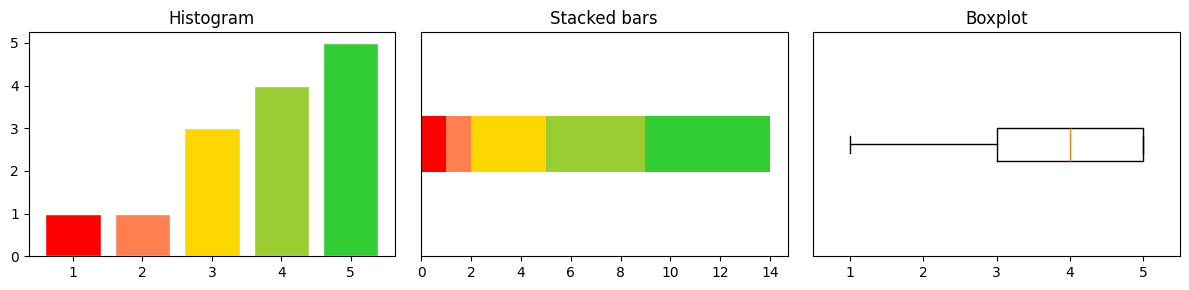

Shapiro-Wilk Statistics=0.865, p=0.036
❌ Data does not look normally distributed.
Using Wilcoxon test because the data is not normally distributed and the sample size is small.
Null Hypothesis: The VR experience did not help to understand the measures to improve thermal conditions in cities.
Mean: 3.7857142857142856
Wilcoxon Test statistic: 54.5
P-value: 0.02466
✋Support H0: The effect is insignificant, when Bonferroni corrected.


c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
testCount = 4
data = data_pre['Hat dir die VR-Erfahrung geholfen zu verstehen, welche Maßnahmen ergriffen werden können, um die thermischen Bedingungen in Städten zu verbessern?']
plot(data)

null_hypothesis = "The VR experience did not help to understand the measures to improve thermal conditions in cities."
if use_shapiro(data):
  print("Using t-test because the data is normally distributed.")
  t_test(data, null_hypothesis, testCount)
elif len(data) < 30:
  print("Using Wilcoxon test because the data is not normally distributed and the sample size is small.")
  wilcoxon_test(data, null_hypothesis, testCount)


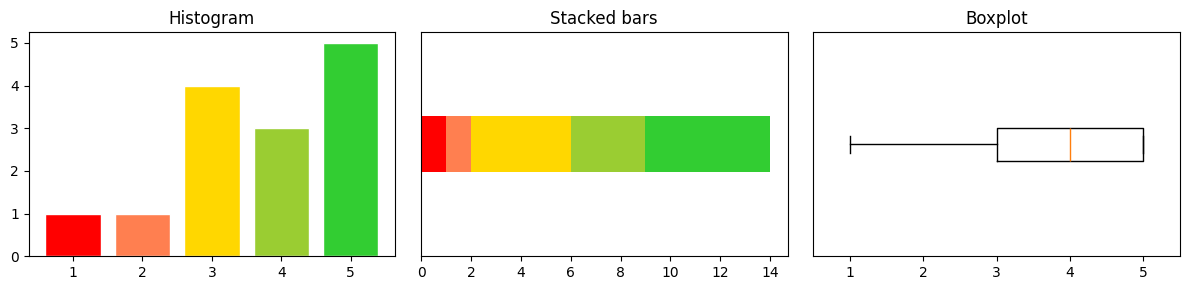

Shapiro-Wilk Statistics=0.874, p=0.048
❌ Data does not look normally distributed.
Using Wilcoxon test because the data is not normally distributed and the sample size is small.
Null Hypothesis: The VR experience did not help to understand the benefits of these measures.
Mean: 3.7142857142857144
Wilcoxon Test statistic: 45.0
P-value: 0.03301
✋Support H0: The effect is insignificant, when Bonferroni corrected.


c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
data = data_pre['Hat Ihnen die VR-Erfahrung geholfen, die Vorteile dieser Maßnahmen zu verstehen?']
plot(data)
null_hypothesis = "The VR experience did not help to understand the benefits of these measures."
if use_shapiro(data):
  print("Using t-test because the data is normally distributed.")
  t_test(data, null_hypothesis, testCount)
elif len(data) < 30:
  print("Using Wilcoxon test because the data is not normally distributed and the sample size is small.")
  wilcoxon_test(data, null_hypothesis, testCount)


### H2: VR applications such as ”Kaisergasse VR” stimulate increased interest in adopting climate-friendly technologies.

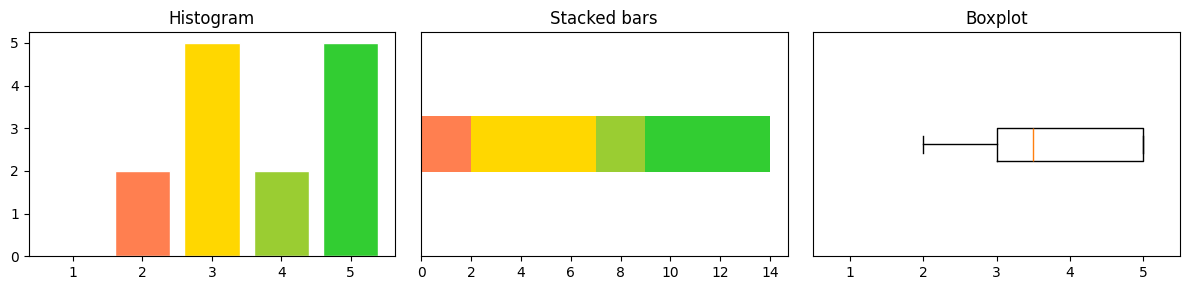

Shapiro-Wilk Statistics=0.842, p=0.017
❌ Data does not look normally distributed.
Using Wilcoxon test because the data is not normally distributed and the sample size is small.
Null Hypothesis: After testing the VR simulation, you would not be more likely to install a green roof.
Mean: 3.7142857142857144
Wilcoxon Test statistic: 40.0
P-value: 0.01658
✋Support H0: The effect is insignificant, when Bonferroni corrected.


c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
data = data_pre['Nach dem Testen der VR-Simulation würdest du jetzt eher eine Dachbegrünung anlegen?']
plot(data)
null_hypothesis = "After testing the VR simulation, you would not be more likely to install a green roof."
if use_shapiro(data):
  print("Using t-test because the data is normally distributed.")
  t_test(data, null_hypothesis, testCount)
elif len(data) < 30:
  print("Using Wilcoxon test because the data is not normally distributed and the sample size is small.")
  wilcoxon_test(data, null_hypothesis, testCount)


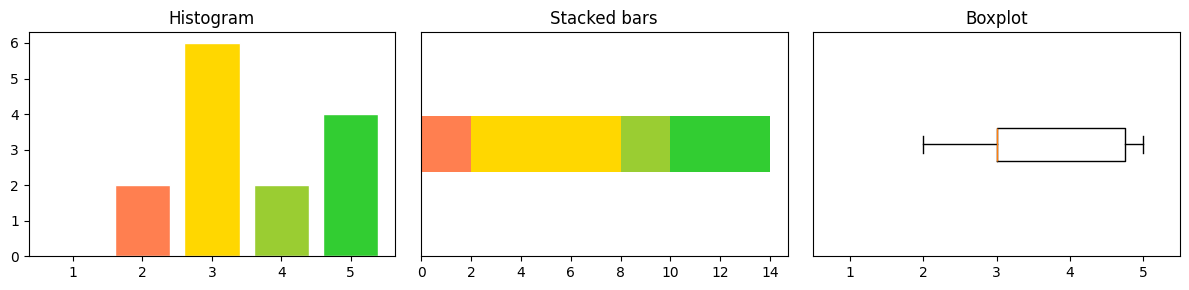

Shapiro-Wilk Statistics=0.849, p=0.022
❌ Data does not look normally distributed.
Using Wilcoxon test because the data is not normally distributed and the sample size is small.
Null Hypothesis: After testing the VR simulation, you would not rather install a PV system on your roof now.
Mean: 3.5714285714285716
Wilcoxon Test statistic: 31.0
P-value: 0.03097
✋Support H0: The effect is insignificant, when Bonferroni corrected.


c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Nelathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
data = data_pre['Nach dem Testen der VR Simulation, würdest du jetzt eher eine PV Anlage auf deinem Dach installieren lassen?']
plot(data)
null_hypothesis = "After testing the VR simulation, you would not rather install a PV system on your roof now."
if use_shapiro(data):
  print("Using t-test because the data is normally distributed.")
  t_test(data, null_hypothesis, testCount)
elif len(data) < 30:
  print("Using Wilcoxon test because the data is not normally distributed and the sample size is small.")
  wilcoxon_test(data, null_hypothesis, testCount)


## Research 2: Impact Assessment of Interactive Photovoltaic Simulation on Understanding and Interest in PV Solutions

is trying to answer the research question: Can an interactive photovoltaic use case increase understanding of and interest in PV solutions?

### H3: Interactive engagement with a photovoltaic simulation in VR significantly enhances both understanding and interest in PV solutions.

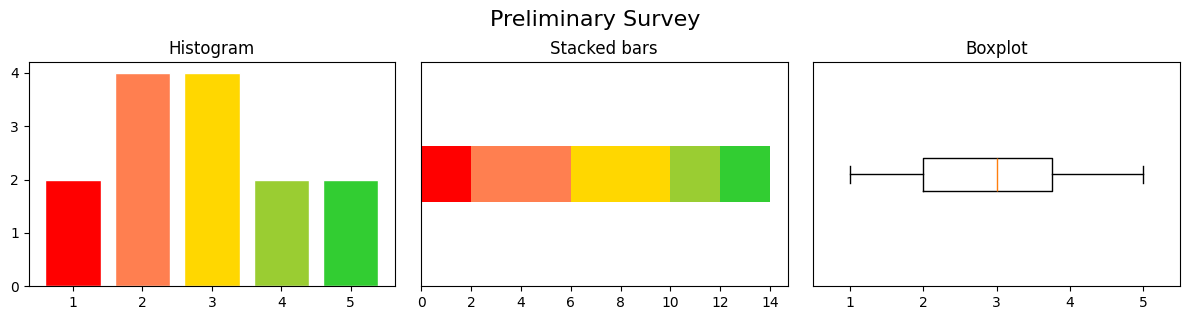

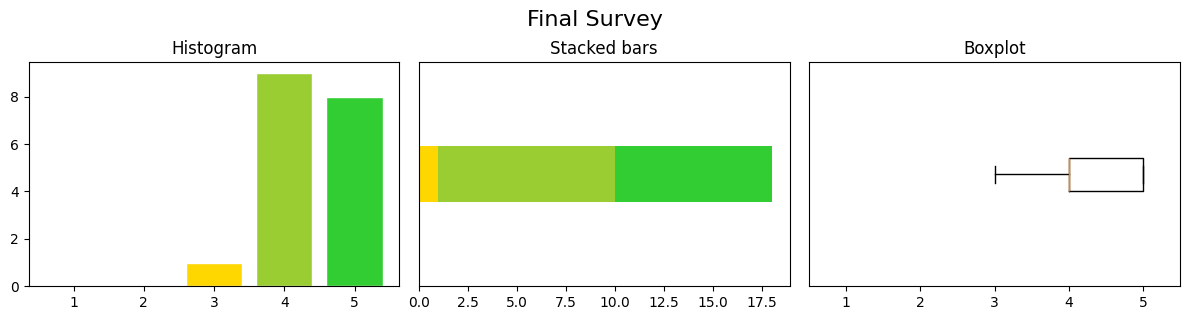

Shapiro-Wilk Statistics=0.923, p=0.243
✅ Data looks normally distributed.
Shapiro-Wilk Statistics=0.752, p=0.000
❌ Data does not look normally distributed.
Using Mann-Whitney U test because the data is not normally distributed and the two samples are neither paired nor related.
Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Mann-Whitney U Statistics=211, p=0.000419
💡Reject H0: The effect is significant.


In [10]:
testCount = 2
dataA = data_pre['Hat dir die VR-Erfahrung geholfen zu verstehen, wie eine Photovoltaik Anlage genutzt werden kann?']
dataB = data_final['Hat dir die VR-Erfahrung geholfen zu verstehen, wie eine Photovoltaik Anlage genutzt werden kann?']

plot(dataA, "Preliminary Survey")
plot(dataB, "Final Survey")

null_hypothesis = "The improved VR experience did not help to better understand how a photovoltaic system can be used."

if use_shapiro(dataA) and use_shapiro(dataB):
  print("both data are normally distributed.")
  raise Exception("Use t-test for paired samples.")
else:
    print("Using Mann-Whitney U test because the data is not normally distributed and the two samples are neither paired nor related.")
    mann_whitney_u_test(dataB, dataA, null_hypothesis, testCount)



***

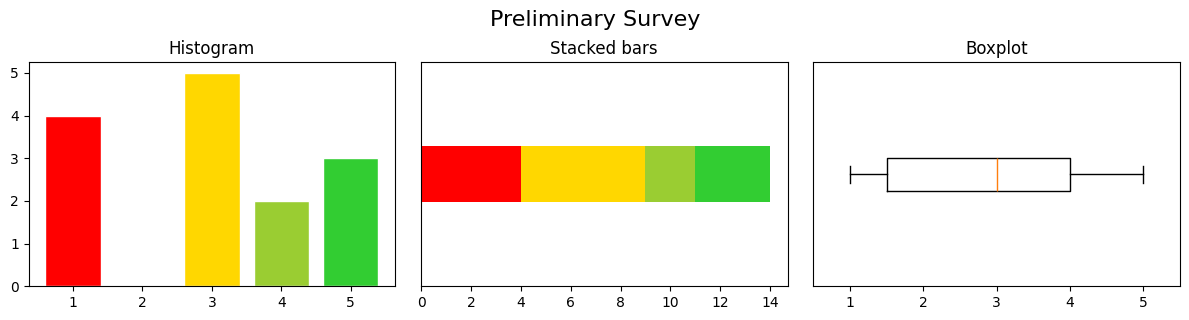

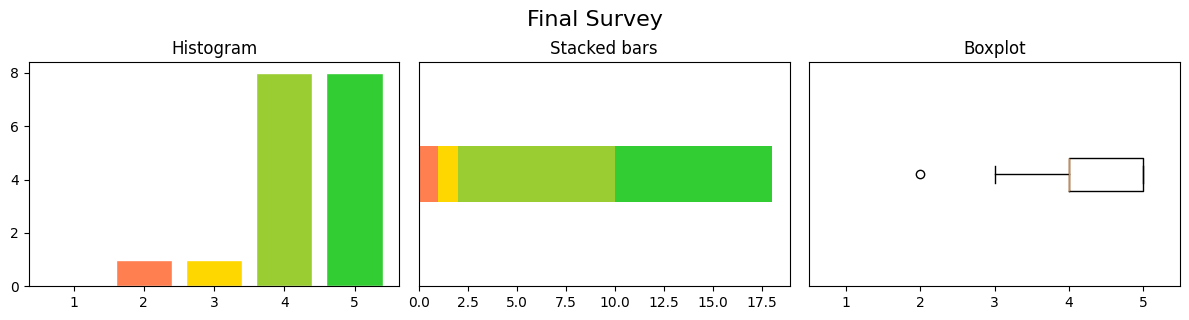

Shapiro-Wilk Statistics=0.859, p=0.029
❌ Data does not look normally distributed.
Using Mann-Whitney U test because the data is not normally distributed and the two samples are neither paired nor related.
Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Mann-Whitney U Statistics=190, p=0.005654
💡Reject H0: The effect is significant.


In [11]:

dataA = data_pre['Hat Ihnen die VR-Erfahrung geholfen, die Vorteile einer Photovoltaik Anlage zu verstehen?']
dataB = data_final['Hat dir die VR-Erfahrung geholfen, die Vorteile einer Photovoltaik Anlage zu verstehen?']

plot(dataA, "Preliminary Survey")
plot(dataB, "Final Survey")

if use_shapiro(dataA) and use_shapiro(dataB):
  print("both data are normally distributed.")
  raise Exception("Use t-test for paired samples.")
else:
    print("Using Mann-Whitney U test because the data is not normally distributed and the two samples are neither paired nor related.")
    mann_whitney_u_test(dataB, dataA, null_hypothesis, testCount)


## Research 3: Investigating Knowledge Enhancement through VR: Optimal PV Panel Orientation

this tries to answer the research question: How does an interactive VR simulation enhance factual knowledge regarding the optimal orientation of photovoltaic panels?

### H4: The interactive PV use case in the VR simulation significantly gain factual knowledge regarding the optimal orientation of PV panels.

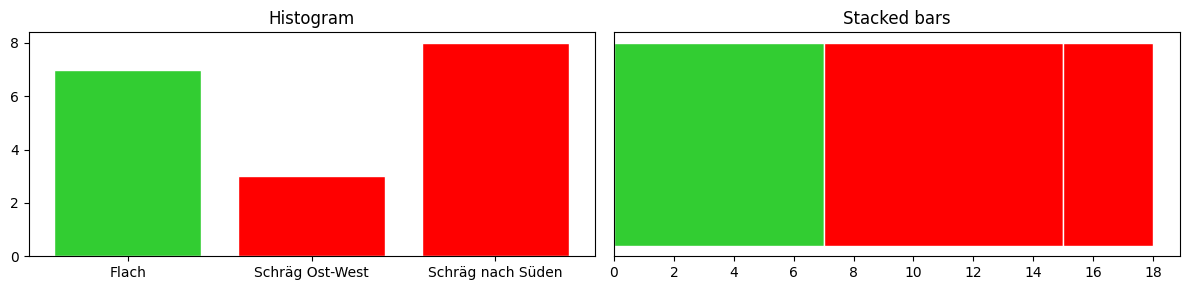

Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Correct: 7
Total: 18
Mean Correct: 38.88888888888889 %
Z-statistic: 0.4834937784152284
P-value: 0.31437
✋Support H0: The proportion of correct answers is not significantly greater than 1/3.
Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Chi-square Statistic: 2.333333333333333
P-value: 0.31140
✋Support H0: The observed distribution is not significantly different from random distribution. The participants chose the answers randomly.


In [12]:
testCount=3
question = 'In welcher Ausrichtung erzeugt ein einzelnes Panel im Juni den meisten Strom?'
data = data_final[question]
results = Counter(data)
correct_answer = "Flach"
plot_quiz(data, correct_answer=correct_answer)

perform_z_test(data, correct_answer, null_hypothesis, testCount)
chi_square_test(data, null_hypothesis, testCount)


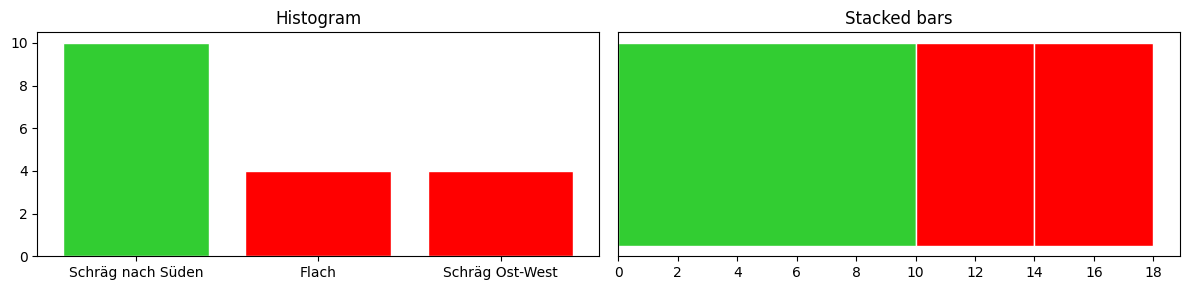

Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Correct: 10
Total: 18
Mean Correct: 55.55555555555556 %
Z-statistic: 1.8973665961010282
P-value: 0.02889
✋Support H0: The proportion of correct answers is not significantly greater than 1/3, when Bonferroni corrected.
Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Chi-square Statistic: 3.9999999999999996
P-value: 0.13534
✋Support H0: The observed distribution is not significantly different from random distribution. The participants chose the answers randomly.


In [13]:
question = 'In welcher Ausrichtung erzeugt ein einzelnes Panel im Dezember den meisten Strom?'
data = data_final[question]
results = Counter(data)
correct_answer = "Schräg nach Süden"
plot_quiz(data, correct_answer=correct_answer)

perform_z_test(data, correct_answer, null_hypothesis, testCount)
chi_square_test(data, null_hypothesis, testCount)


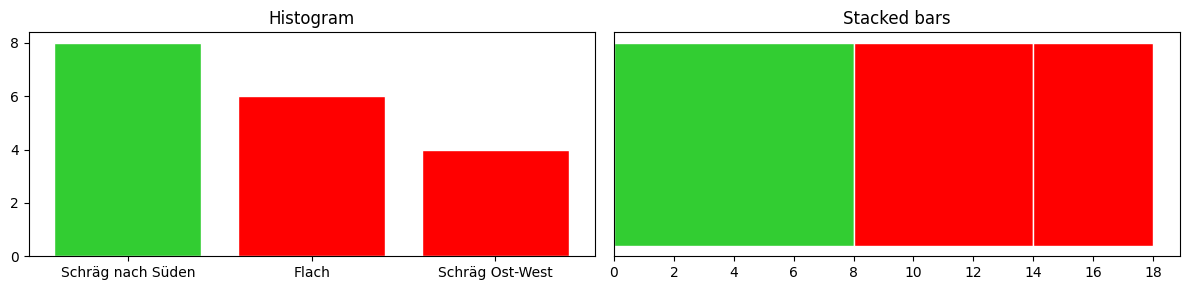

Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Correct: 8
Total: 18
Mean Correct: 44.44444444444444 %
Z-statistic: 0.9486832980505138
P-value: 0.17139
✋Support H0: The proportion of correct answers is not significantly greater than 1/3.
Null Hypothesis: The improved VR experience did not help to better understand how a photovoltaic system can be used.
Chi-square Statistic: 1.3333333333333333
P-value: 0.51342
✋Support H0: The observed distribution is not significantly different from random distribution. The participants chose the answers randomly.


In [14]:
question = 'In welcher Ausrichtung erzeugt ein einzelnes Panel übers Jahr den meisten Strom?'
data = data_final[question]
results = Counter(data)
correct_answer = "Schräg nach Süden"
plot_quiz(data, correct_answer=correct_answer)

perform_z_test(data, correct_answer, null_hypothesis, testCount)
chi_square_test(data, null_hypothesis, testCount)
